In [1]:
import networkx as nx       #pacchetto per reti
import numpy as np
import ipyparallel as ipp   #pacchetto per parallelizzazione
import time as clock
import matplotlib.pyplot as plt
#import winsound
from Node import *          #pacchetto agente Node
from NetworkTool import *   #pacchetto strumenti vari
from GenerativeTool import *#pacchetto per generare network
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
TheTime = 0
listNodes = [200,300,400]
listnFriends = [1,2,4,8]
listLayer = [2,4,8]
listbdist = [[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1],[0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.3],[0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]]
bpos = [[0],[0,1],[0,2],[0,1,2],[2,3,4],[1,3],[0,2,4,6],[1,3,7,5]]

In [3]:
%%time
statS=[]
mgstats=[]
start = clock.clock()
for k in range (10):
    print(k)
    for Nodes in listNodes:#2
        print(Nodes)
        print(clock.clock()-start, 'sec elapsed since Nodes')
        start = clock.clock()
        for nFriends in listnFriends:#3
            for Layer in listLayer:#3
                for bdist in listbdist: #3
                    MG = nx.MultiGraph()
                    for i in range(Nodes):
                        tnew = Node(i,np.random.random(8),[], TheTime)
                        MG.add_node(tnew)
                        tlay = np.random.randint(Layer)
                        AttachChoosenBelief(MG, tnew, nFriends, tlay, bpos[tlay], bdist[tlay],0,0)
                    for i in range(Layer):
                        statS.append([Nodes,nFriends,Layer,bdist[0]]+LayerAnalisys(MG, i)) #
                    mgstats.append([Nodes,nFriends,Layer,bdist[0]]+NetAnalisys(MG))  
                    MG.clear() #pulisco rete

0
200
0.00011618478718272425 sec elapsed since Nodes


C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\stats.py:2975: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\stats.py:5041: RuntimeWarning: invalid value encountered in less
  x = np.where(x < 1.0, x, 1.0)  # if x > 1 then return 1.0


nan error! layer:  7
300
95.70373454034137 sec elapsed since Nodes
400
333.30096745389045 sec elapsed since Nodes
1
200
722.085330952161 sec elapsed since Nodes
300
115.40662786997973 sec elapsed since Nodes
400
327.76909895207905 sec elapsed since Nodes
2
200
792.4457037287925 sec elapsed since Nodes
300
113.16465929734886 sec elapsed since Nodes
400
439.6986343155668 sec elapsed since Nodes
3
200
897.7449797292443 sec elapsed since Nodes
300
112.40637168868216 sec elapsed since Nodes
400
300.6471509067951 sec elapsed since Nodes
4
200
945.4150321766174 sec elapsed since Nodes
300
129.38253574324335 sec elapsed since Nodes
400
481.0477613901112 sec elapsed since Nodes
5
200
804.6202399646936 sec elapsed since Nodes
nan error! layer:  7
300
129.48009114142315 sec elapsed since Nodes
400
319.06818856421523 sec elapsed since Nodes
6
200
763.7027619546143 sec elapsed since Nodes
300
102.58823495602064 sec elapsed since Nodes
400
341.8343048926936 sec elapsed since Nodes
7
200
671.93011464

In [4]:
#print(stats)

In [5]:
f = open( 'ACB2stats.txt', 'w' )
f.write( repr(statS) )
f.close()
f = open('ACB2statsNET.txt','w')
f.write( repr(mgstats) )
f.close()

2
[0.11737409399569465]
4
[0.11737409399569465, -0.052213390244610816]
8
[0.11737409399569465, -0.052213390244610816, -0.28255417330785448]


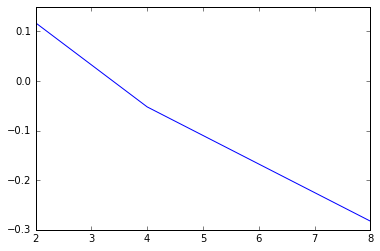

In [6]:
lbd = []
for i in listbdist: lbd.append(i[0])
#0nodes,1nfriends,2layer,3bdist,4layer,5assort,6clust,7deg
var=2 #0,1,2,3,4,5
fun=5 #7,8,9
term=[listNodes,listnFriends,listLayer,lbd]
y=[]
for j in term[var]:
    print(j)
    temp=[]
    for i in statS:
        if i[var]==j:
            if not math.isnan(i[fun]):
                temp.append(i[fun])
    y.append(np.mean(temp))
    print(y)
plt.plot(term[var],y)


In [1]:

lbd = []
for i in listbdist: lbd.append(i[0])
term=[listNodes,listnFriends,listLayer,lbd]
varname=['Nodes','Friends','Num. Layers','Distance Bel.']
funname=['Layer', 'Assortativity','Clustering','Avg. Degree']
for n in range(3):
    fig = plt.figure(figsize=(45,40))
    fun = n+5
    print(funname[n+1])#remeber to add1 to skip layer data
    for k in range(len(term)):
        var=k
        y=[]
        for j in term[var]:
            temp=[]
            for i in statS:
                if i[var]==j and not math.isnan(i[fun]):
                    temp.append(i[fun])
            y.append(np.mean(temp))
        g=k+1
        ax = fig.add_subplot(3,5,g)
        #ax.set_title(varname[var], fontsize=24)
        ax.set_xlabel(varname[var], fontsize=26)
        ax.set_ylabel(funname[n+1], fontsize=26)
        ax.plot(term[var],y)
    fig.savefig('ACB2'+funname[n+1]+'.png',orientation='landscape',bbox_inches='tight',dpi='figure')
plt.show

NameError: name 'listbdist' is not defined

In [11]:
mgstats[27]

[200, 8, 2, 0.1, 0.13024324987241948, 10.57]

Assortativity
Avg.Degree


<function matplotlib.pyplot.show>

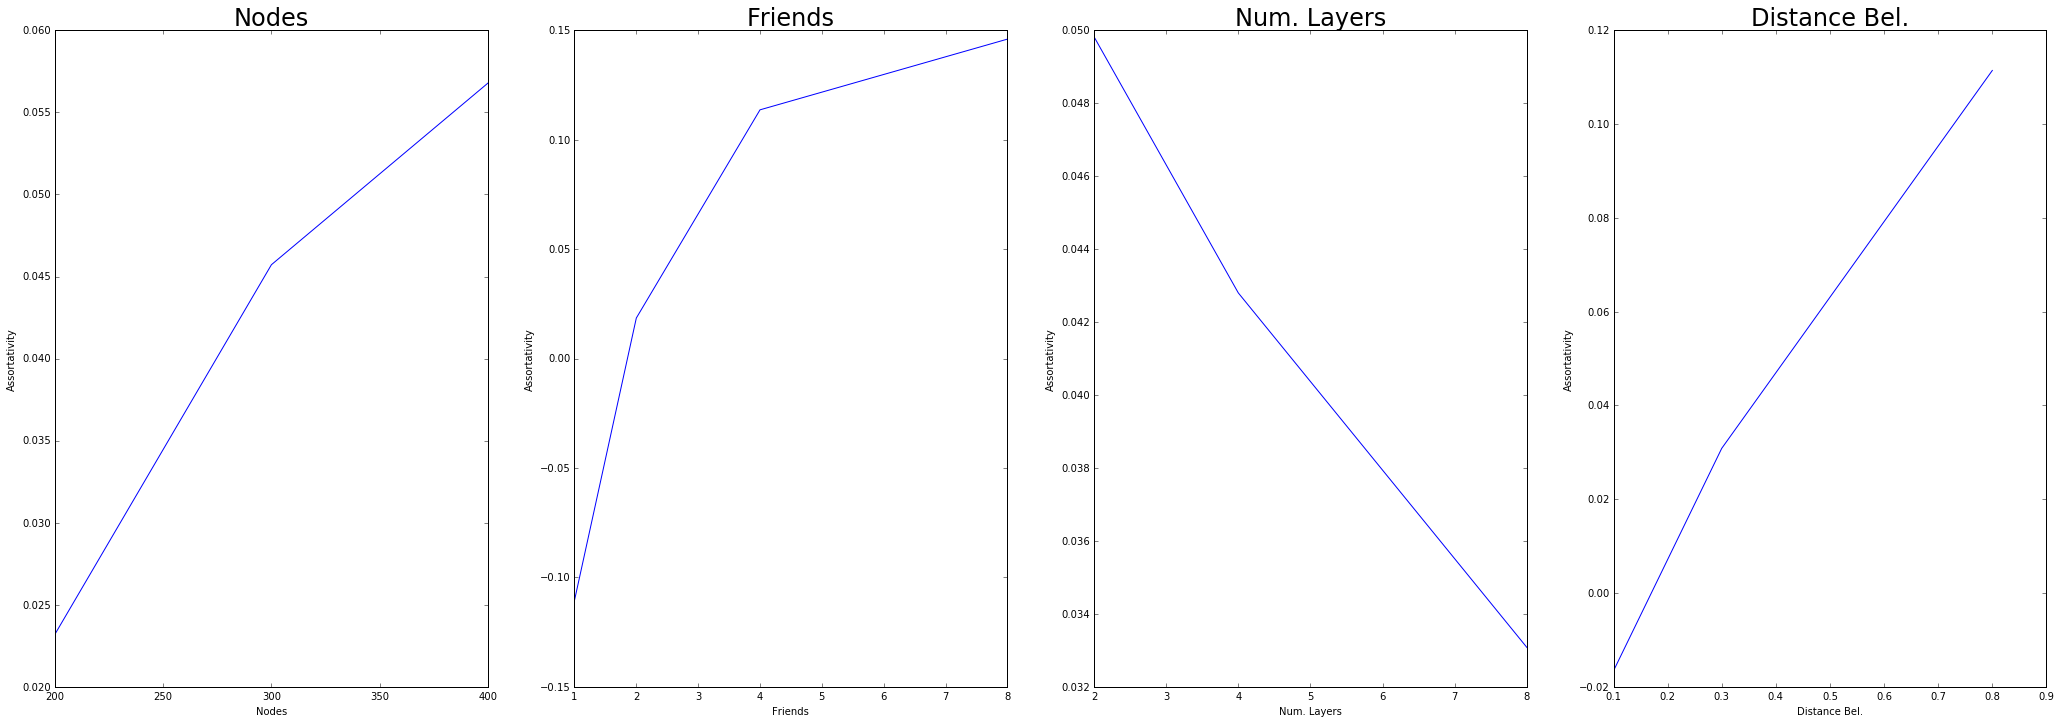

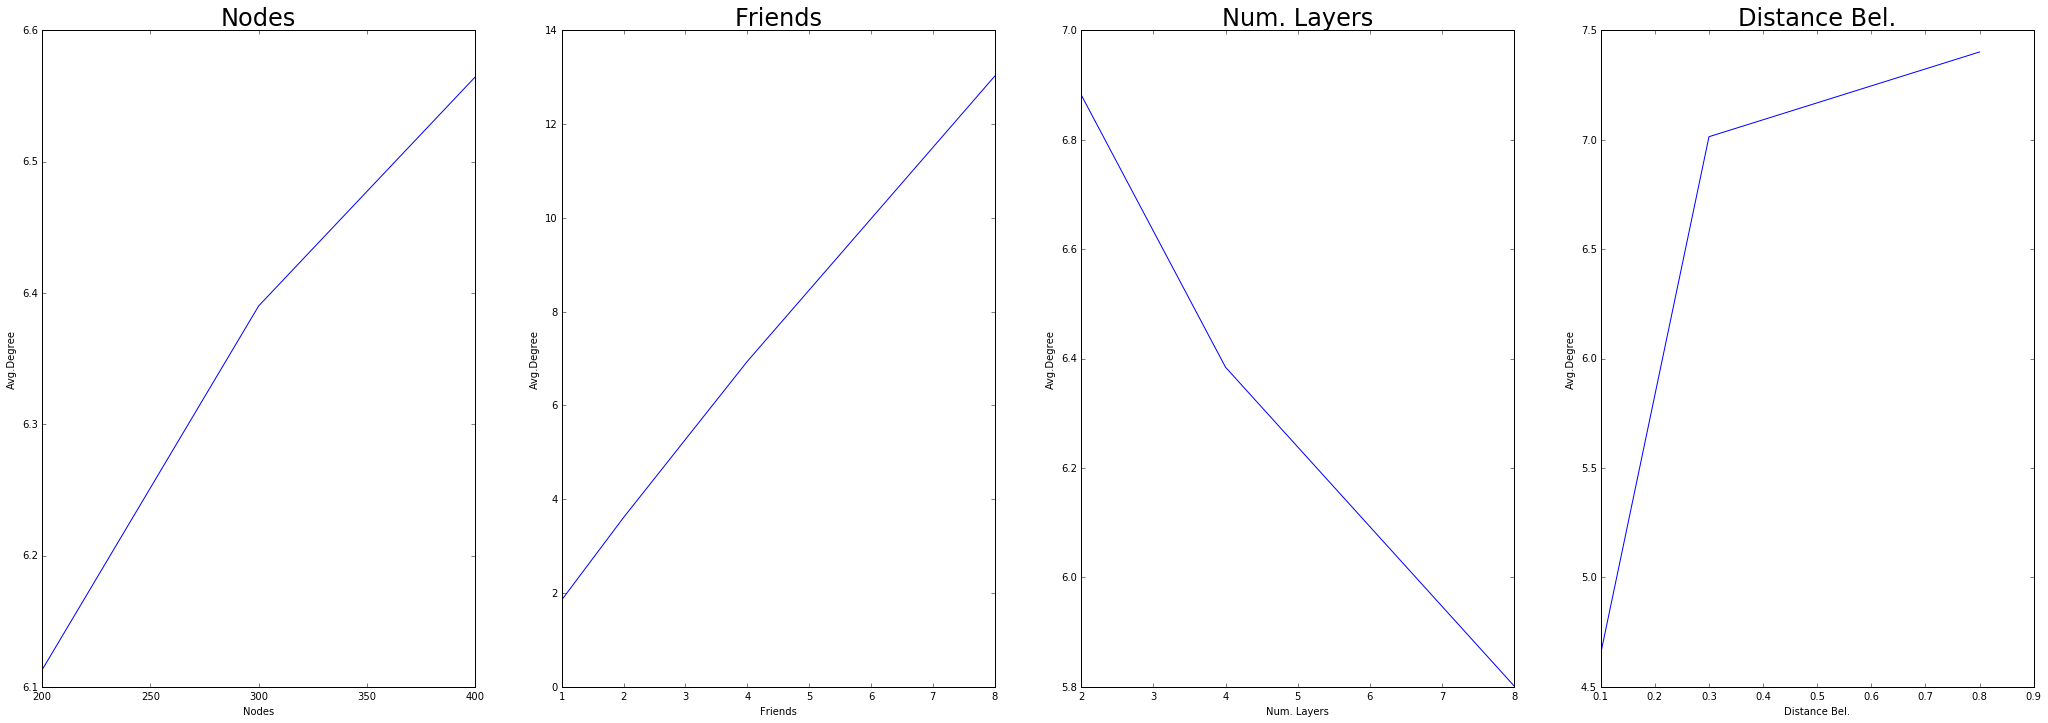

In [13]:
funname = ['Assortativity','Avg.Degree']
for n in range(2):
    fig = plt.figure(figsize=(45,40))
    fun = n+4
    print(funname[n])
    for k in range(len(term)):
        var=k
        y=[]
        for j in term[var]:
            temp=[]
            for i in mgstats:
                if i[var]==j and not math.isnan(i[n]):
                    temp.append(i[fun])
            y.append(np.mean(temp))
        g=k+1
        ax = fig.add_subplot(3,5,g)
        ax.set_title(varname[var], fontsize=24)
        ax.set_xlabel(varname[var])
        ax.set_ylabel(funname[n])
        ax.plot(term[var],y)
    fig.savefig('ACB2NET'+funname[n]+'.png',orientation='landscape',bbox_inches='tight',dpi='figure')
plt.show